In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# O(1) implementation of uniform quantizer

# in_val: input samples
# n_bits: quantization bit depth
# xmax: maximum amplitude
# m: quantization level


def UniformQuantizer(in_val, n_bits, xmax, m):

    """
    Uniform Scaler Quantization

    Parameters
    - in_val: input samples
    - n_bits: bitdepth of quantization
    - xmax: maximum value of the symmetric signal
    - m: type of quantization (mid-rise / mid-tread)

    Returns
    - q_ind : quantized levels
    
    """

    in_val = np.array(in_val)

    L = 1 << n_bits
    delta = 2 * xmax / L

    q_indices = (xmax + in_val) // delta
    q_indices = np.clip(q_indices, 0, L-1)  

    return q_indices

def UniformDequantizer(q_ind, n_bits, xmax, m):

    """
    Uniform Scaler Dequantization

    Parameters
    - q_ind: quantized values
    - n_bits: bitdepth of quantization
    - xmax: maximum value of the symmetric signal
    - m: type of quantization (mid-rise / mid-tread)

    Returns
    - deq_values: voltage levels corresponding to the quantized values
    
    """

    q_ind = np.array(q_ind)

    L = 1 << n_bits
    delta = 2 * xmax / L

    deq_values = -xmax + (q_ind + 0.5 * m) * delta
    return deq_values

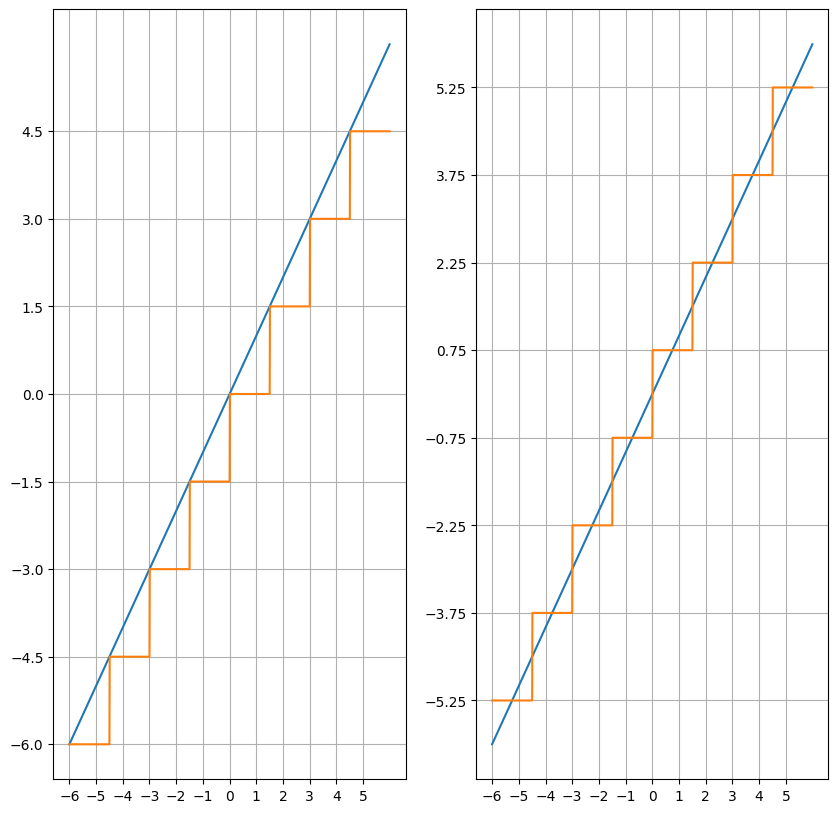

In [3]:
# Test 1

xmax = 6
bitdepth = 3

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x = np.arange(-6, 6, 0.01)
input_signal = x

# midrise
quantized_signal = UniformQuantizer(input_signal, bitdepth, xmax, 0)
dequantized_signal = UniformDequantizer(quantized_signal, bitdepth, xmax, 0)

x_ticks = np.arange(-6, 6, 1)
ax1.grid()
ax1.set_xticks(x_ticks)
ax1.set_yticks(np.unique(dequantized_signal))
ax1.plot(x, input_signal)
ax1.plot(x, dequantized_signal)

# midtread
quantized_signal = UniformQuantizer(input_signal, bitdepth, xmax, 1)
dequantized_signal = UniformDequantizer(quantized_signal, bitdepth, xmax, 1)

x_ticks = np.arange(-6, 6, 1)
ax2.grid()
ax2.set_xticks(x_ticks)
ax2.set_yticks(np.unique(dequantized_signal))
ax2.plot(x, input_signal)
ax2.plot(x, dequantized_signal)

plt.show()

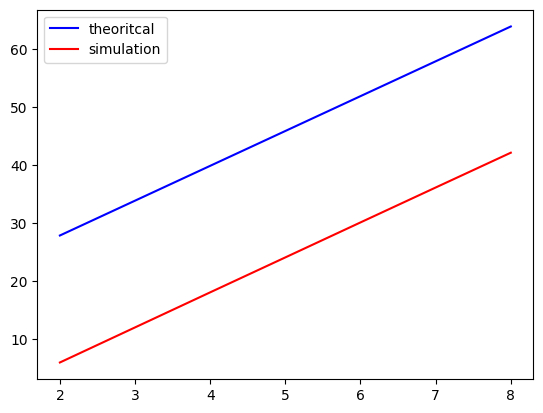

In [16]:
# Uniform random input (Test 2)

def calculateSNR(input, bitdepth, xmax, m):
    quantized_signal = UniformQuantizer(input, bitdepth, xmax, m)
    dequantized_signal = UniformDequantizer(quantized_signal, bitdepth, xmax, m)
    signal_power = np.mean(input ** 2)
    error_power = np.mean((input - dequantized_signal) ** 2)
    snr = 10 * np.log10(signal_power / error_power)
    return snr


xmax = 5
m = 0
snrs = []

input = np.random.uniform(-5, 5, 10 ** 4)
bitdepths = [i for i in range(2, 9, 1)]



for bitdepth in bitdepths:
    snrs.append(calculateSNR(input, bitdepth, xmax, m))

snrs_theortical = [10 * np.log2(3) + 6 * bitdepth for bitdepth in bitdepths]

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)

ax.plot(bitdepths, snrs_theortical, color='b', label='theoritcal')
ax.plot(bitdepths, snrs, color='r', label='simulation')
ax.legend()

plt.show()

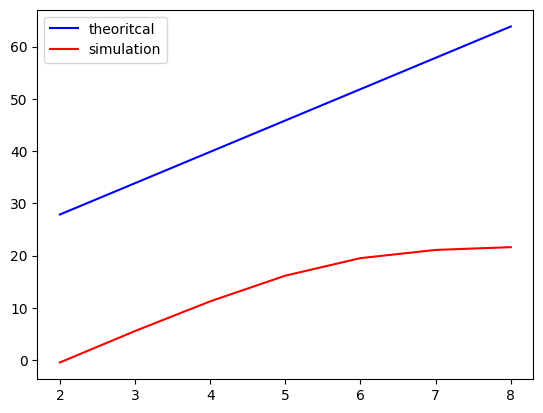

In [15]:
# Non uniform random input (Test 3)

magnitudes = np.random.exponential(1, 10000)
polarity = np.random.choice([-1, 1], 10000)

input = magnitudes * polarity
bitdepths = [i for i in range(2, 9, 1)]
snrs = []

for bitdepth in bitdepths:
    snrs.append(calculateSNR(input, bitdepth, xmax, m))

snrs_theortical = [10 * np.log2(3) + 6 * bitdepth for bitdepth in bitdepths]

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)

ax.plot(bitdepths, snrs_theortical, color='b', label='theoritcal')
ax.plot(bitdepths, snrs, color='r', label='simulation')
ax.legend()

plt.show()


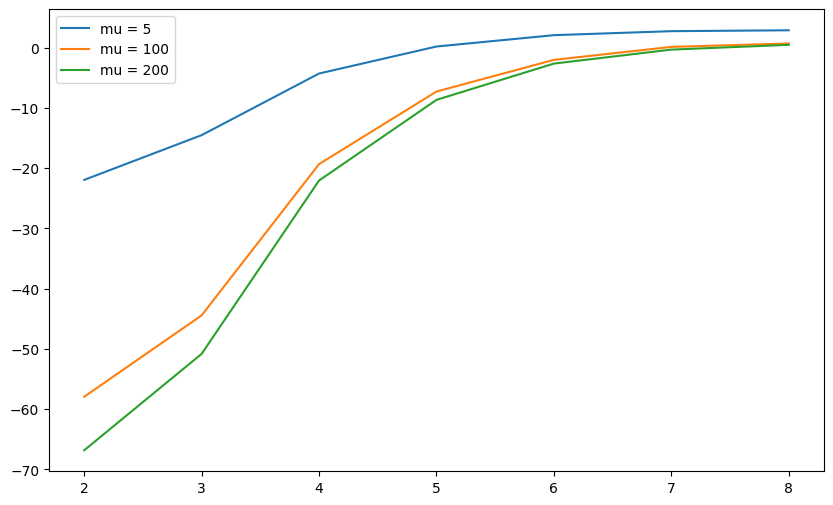

In [27]:
# Non uniform quantization

figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(111)


def mu_compress(x, mu):
    return np.sign(x) * (np.log1p(mu * np.abs(x)) / np.log1p(mu) )

def mu_expand(y, mu):
    return np.sign(y) * ((1 / mu) * (np.expm1(np.abs(y) * np.log1p(mu))))

def calculateSNR(input, bitdepth, xmax, m, mu):
    input = mu_compress(input, mu)
    quantized_signal = UniformQuantizer(input, bitdepth, xmax, m)
    dequantized_signal = UniformDequantizer(quantized_signal, bitdepth, xmax, m)
    dequantized_signal = mu_expand(dequantized_signal, mu)
    signal_power = np.mean(input ** 2)
    error_power = np.mean((input - dequantized_signal) ** 2)
    snr = 10 * np.log10(signal_power / error_power)
    return snr

magnitudes = np.random.exponential(1, 10000)
polarity = np.random.choice([-1, 1], 10000)

input = magnitudes * polarity
xmax = 5
m = 0

mus = [i for i in [5, 100, 200]]

for mu in mus:
    bitdepths = [i for i in range(2, 9, 1)]

    snrs = []

    for bitdepth in bitdepths:
        snrs.append(calculateSNR(input, bitdepth, xmax, m, mu))

    ax.plot(bitdepths, snrs, label = f"mu = {mu}")
    

ax.legend()
plt.show()
    


